In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns #seaborn used for data visualization https://seaborn.pydata.org/
import datetime as dt #https://docs.python.org/3/library/datetime.html used to convert date to days

from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import time

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

For this mini project, we will be focusing on whether we can accurately predict the numerical category: `reviews_per_month`.  The `AB_NY_2019` New York City Airbnb listings is a dataset which includes 15 columns; 8 of which are numerical and 7 are categorical, and with sample size *n = 48895*.  We can use these variables to build a regression model which we hope can accurately predict our target variable `reviews_per_month`.  We will be using a combination of regression models, cross-validation scores, and hyper-parameter fine-tuning on our training set to fully optimize our model before evaluating on the test set.

In [3]:
#We have excluded `id` from our dataset as it doesn't provide any insightful value
airbnb_df = pd.read_csv("data/AB_NYC_2019.csv", index_col=0)
airbnb_df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb_df.shape

(48895, 15)

In [5]:
len(airbnb_df)

48895

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [6]:
X = airbnb_df.drop('reviews_per_month', axis = 1)
y = airbnb_df['reviews_per_month']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123
)

#X.head()
#pd.DataFrame(y)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

Initial observations:
- The missing percentage for `last_review` and `reviews_per_month` are exactly the same; indicating that if there are N/A for `last_review`, then there will be N/A for `reviews_per_month`, thus N/A can be mutated into 0.
- There are some missing values for `name` and `host_name`
- `reviews_per_month` have **mean = 1.37** and **std = 1.70** indicating that we can expect there to be an average of review_per_month  = 1.37.
- no multicollinearity can be discovered in the `X_train`
- We will be dropping `name` and `host_name` as we can use `host_id` for `host_name`; and for `name` we do not want the additional noise.

In [7]:
#Since it would take a long time to generate bar graphs, we will just print out the values
categorical_cols = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'last_review']

In [8]:
#Checking out the categorical variables which can be ordinally encoded or one-hot encoded.
for col in categorical_cols:
    print(X_train[col].value_counts())

name
Home away from home                                 14
New york Multi-unit building                        13
Loft Suite @ The Box House Hotel                    10
Hillside Hotel                                      10
Brooklyn Apartment                                   9
                                                    ..
Spacious, cozy, fully equipped apartment with AC     1
Spacious, rare, elegant, art-filled loft w sauna     1
Bushwhick Room for Rent                              1
Gorgeous Pre-War Two-Bedroom by the Hudson           1
Cozy Private Room w/ 1 Queen Bed                     1
Name: count, Length: 33662, dtype: int64
host_name
David                  292
Michael                287
Sonder (NYC)           218
Alex                   198
John                   197
                      ... 
Avelino                  1
Amy-JPSU                 1
Mark And Annunziata      1
Marysell                 1
Musieka                  1
Name: count, Length: 9201, dtype: int64
ne

In [9]:
#Checking out the categorical variables which can be ordinally encoded or one-hot encoded.
for col in categorical_cols:
    print(X_train[col].unique())

['Cozy 1 Bedroom Apt in Hamilton Heights'
 'Amazing One Bedroom at the Time Square Area/72B'
 'New Spacious Master, Williamsburg' ... 'Sunlit, spacious NY apartment'
 'One room.' 'Cozy Private Room w/ 1 Queen Bed']
['Tommy' 'Irina' 'Nick' ... 'Rossana' 'K Alexandra' 'Musieka']
['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
['Washington Heights' "Hell's Kitchen" 'Williamsburg' 'Park Slope'
 'Bedford-Stuyvesant' 'Fort Greene' 'Harlem' 'East Flatbush'
 'East Village' 'Jamaica' 'Upper West Side' 'Murray Hill'
 'Financial District' 'Long Island City' 'Clifton' 'Carroll Gardens'
 'Midtown' 'Upper East Side' 'Crown Heights' 'East Elmhurst'
 'Middle Village' 'Vinegar Hill' 'East Harlem' 'Theater District'
 'Ridgewood' 'Morningside Heights' 'Kips Bay' 'Kingsbridge' 'Sunnyside'
 'Maspeth' 'Gowanus' 'Bushwick' 'Tribeca' 'Astoria' 'Chinatown' 'Chelsea'
 'Flushing' 'Rego Park' 'Clinton Hill' 'Lower East Side' 'Kensington'
 'Pelham Gardens' 'Sunset Park' 'Fort Hamilton' 'Prospect Heights'

From the categorical variable levels, we can infer that `last_review`, `host_name` and `name` will overfit/complexify our model since there are minimal values and will create additional noise for our data.  It could be true that they have a small significance to predicting `reviews_per_month`, however we will be excluding since it will make our model less complex which will be better for generalization.

In [10]:
#Summary Statistics For the X_training set (variables used to train the model)
X_train.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000
mean,6.726273e+07,40.729142,-73.952083,151.528399,7.094957,23.244814,7.042453,112.526004
std,7.840511e+07,0.054531,0.046201,236.628392,21.548290,44.573323,32.590803,131.420031
min,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.721897e+06,40.690193,-73.983030,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.074526e+07,40.723240,-73.955550,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.068375e+08,40.763287,-73.936270,175.000000,5.000000,23.000000,2.000000,225.750000
max,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [11]:
#Summary statistics for the y_train set("reviews_per_month")
y_train.describe()

count    27236.000000
mean         1.369816
std          1.700737
min          0.010000
25%          0.190000
50%          0.710000
75%          2.000000
max         58.500000
Name: reviews_per_month, dtype: float64

<Axes: >

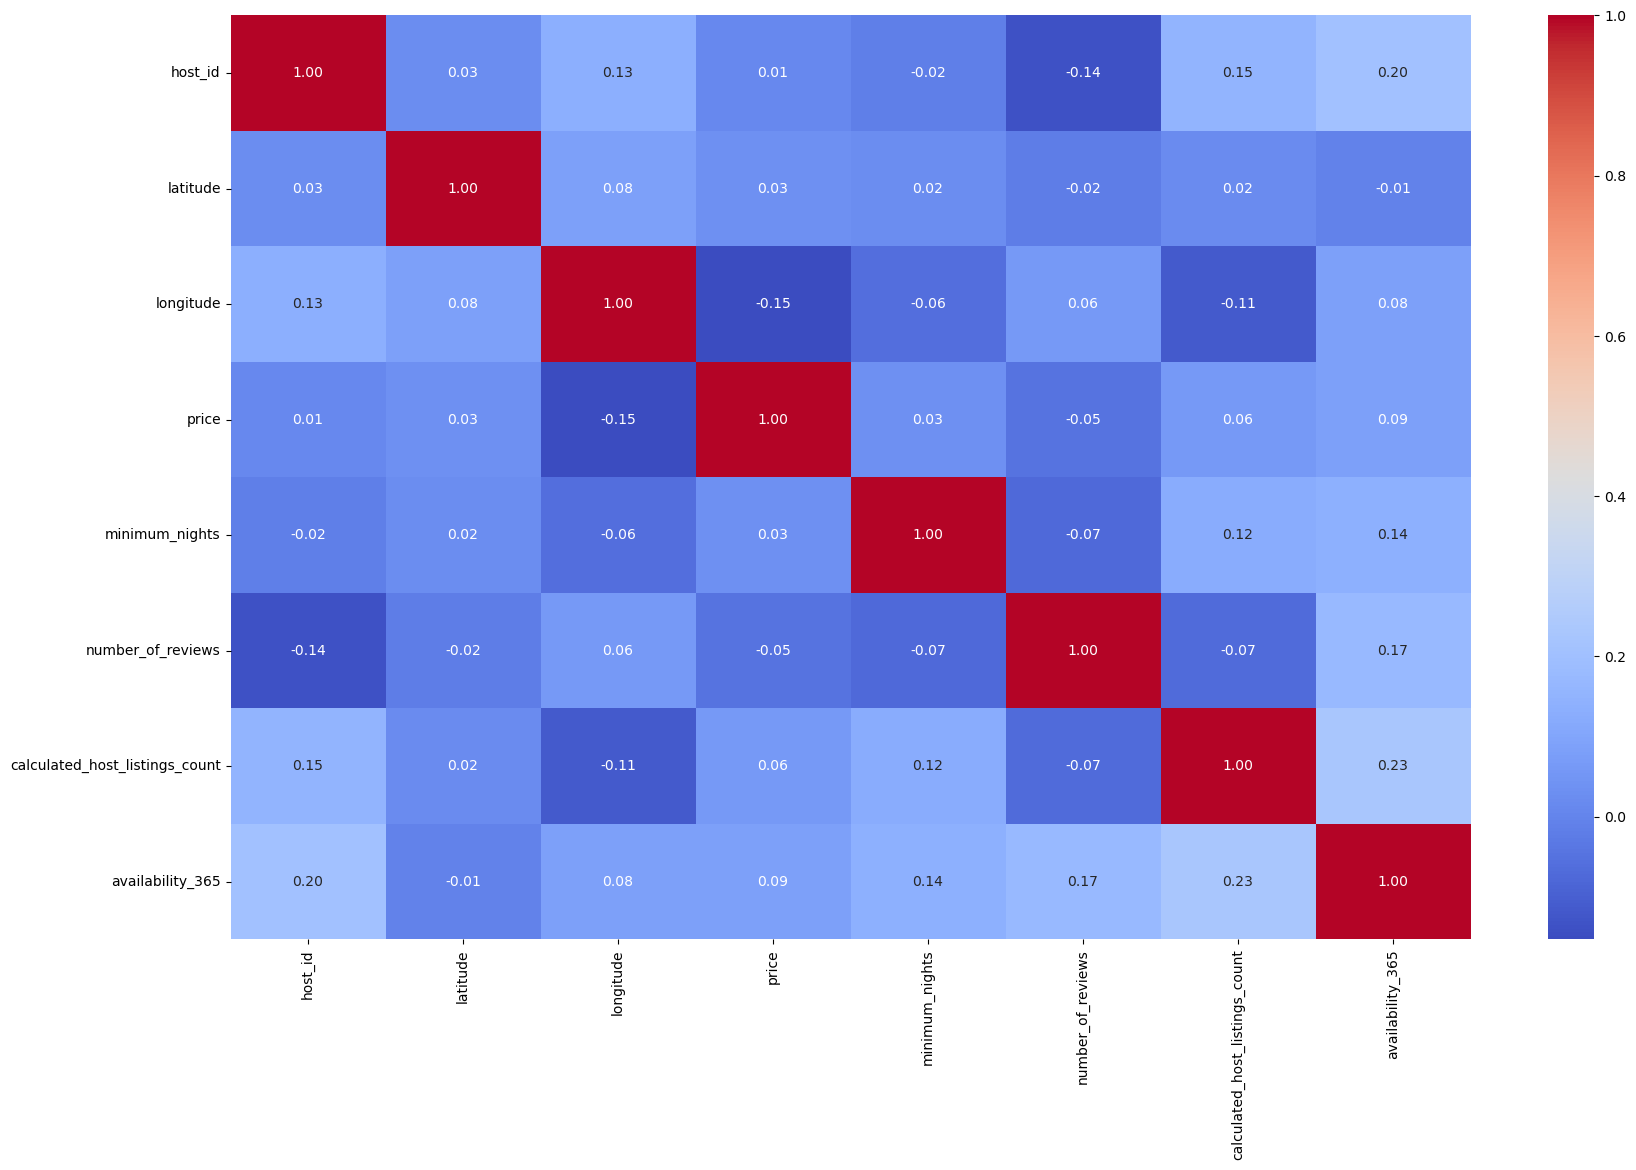

In [12]:
correlation_matrix = X_train.corr(numeric_only = True)
plt.figure(figsize = (20,12))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')

A correlation heat-map to test for multicollinearity.  If two input variables $X_1$ and $X_2$ are highly correlated, we can undermine the statistical significance of our model.  From the matrix we see that there seems to be no high correlated input variables so we do not need to worry about multicollinearity.

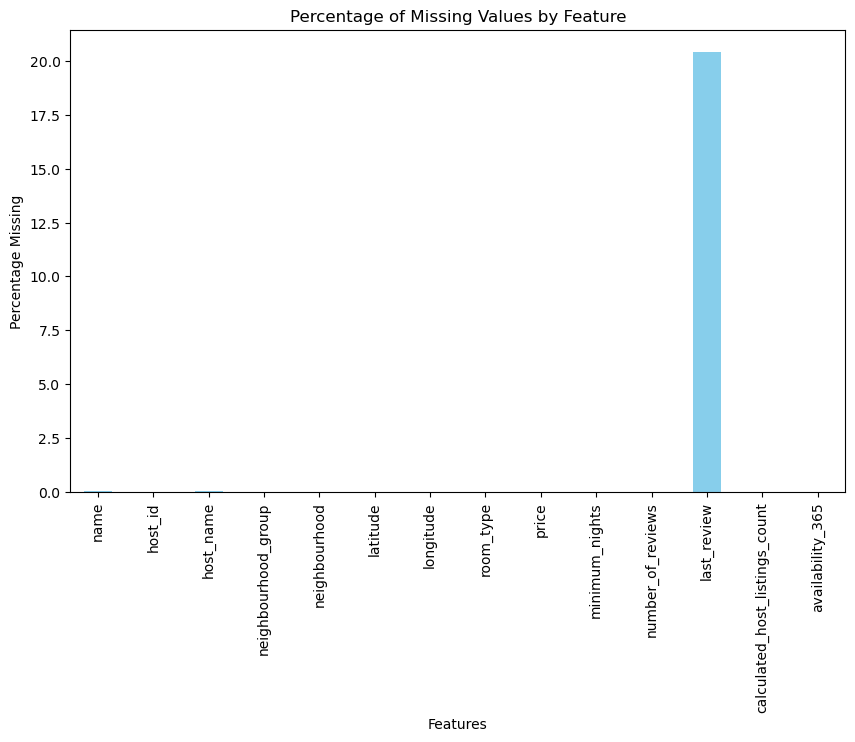

In [13]:
#Finds the percentage of missing values
missing_values_X = X_train.isnull().mean() * 100

plt.figure(figsize=(10, 6))
missing_values_X.plot(kind='bar', color='skyblue')
plt.title("Percentage of Missing Values by Feature")
plt.xlabel("Features")
plt.ylabel("Percentage Missing")
plt.show()

In [14]:
missing_values_X

name                               0.029218
host_id                            0.000000
host_name                          0.049670
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.423070
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

From the graph generated above, we see that the feature `last_review` is the only categorical with missing values containing a huge chunk of 20.4% of missing values; while some variables such as `host_name` and `name` contains few missing variables.  We can deal with these features in the later steps of preprocessing.

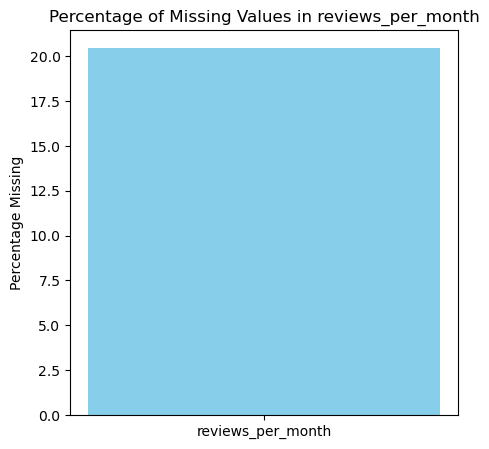

In [15]:
missing_percentage_y = y_train.isnull().mean() * 100

# Plot the missing percentage as a bar
plt.figure(figsize=(5, 5))
plt.bar(['reviews_per_month'], [missing_percentage_y], color='skyblue')
plt.title("Percentage of Missing Values in reviews_per_month")
plt.ylabel("Percentage Missing")
plt.show()

In [16]:
missing_percentage_y

20.423070180564483

From this bar plot above, we see that the total missing percentage of `reviews_per_month` in the training set is around 20.4%.  Which is coincidentally the same as the missing percentage of `last_review` in the X_train dataset; from inference we can say that if `last_review` is N/A, there have been no reviews made about the airbnb at all so we can mutate `reviews_per_month` into 0.

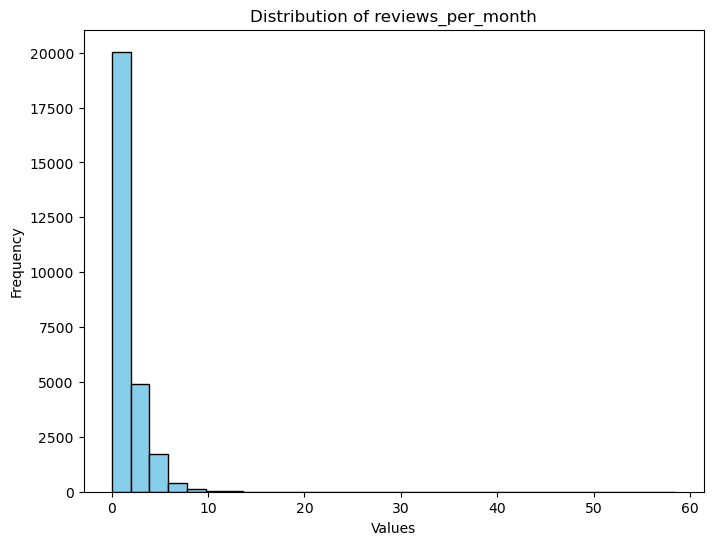

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(y_train, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of reviews_per_month")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()

Plotting the histogram for `reviews_per_month` we can see that the histogram resembles a right-skewed distribution with more airbnbs have a lower `reviews_per_month` score.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [18]:
#Price per min night can express the true cost for night and can be relevant for
X_train['price_per_min_night'] = X_train['price']/X_train['minimum_nights']
X_test['price_per_min_night'] = X_test['price']/X_test['minimum_nights']

X_train['price_per_min_night'].head()

id
28736148     24.000000
34613254      5.000000
11144496    200.000000
766814       95.000000
16162621     66.333333
Name: price_per_min_night, dtype: float64

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [19]:
X_train.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365,price_per_min_night
id,,,,,,,,,,,,,,,
28736148,Cozy 1 Bedroom Apt in Hamilton Heights,43431867,Tommy,Manhattan,Washington Heights,40.83256,-73.94440,Entire home/apt,96,4,0,NaN,1,17,24.000000
34613254,Amazing One Bedroom at the Time Square Area/72B,48146336,Irina,Manhattan,Hell's Kitchen,40.76134,-73.99299,Entire home/apt,150,30,0,NaN,20,332,5.000000
11144496,"New Spacious Master, Williamsburg",48819868,Nick,Brooklyn,Williamsburg,40.71119,-73.95097,Private room,200,1,0,NaN,1,0,200.000000
766814,Adorable Midtown West Studio!,4022922,Caitlin,Manhattan,Hell's Kitchen,40.75900,-73.99530,Entire home/apt,95,1,0,NaN,1,0,95.000000
16162621,NEW! Exceptional 2BR/1BA Williamsburg Oasis,104781467,Russell,Brooklyn,Williamsburg,40.71306,-73.94856,Entire home/apt,199,3,1,2016-12-11,1,0,66.333333


In [20]:
numerical_features = ["host_id", "latitude", "longitude", "price", "minimum_nights",
                      "number_of_reviews", "calculated_host_listings_count", "availability_365", "price_per_min_night"]
ordinal_features = ["room_type"]
categorical_features = ["neighbourhood_group", "neighbourhood"]
drop_features = ["name", "host_name", "last_review"]

In [21]:
#Code snippet taken from hw3
room_type_levels = ['Shared room', 'Private room', 'Entire home/apt']
ordinal_transformer = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OrdinalEncoder(categories=[room_type_levels])
)

In [22]:
categorical_transformer = make_pipeline(SimpleImputer(strategy = "constant", fill_value = "missing"),
                                        OneHotEncoder(handle_unknown = "ignore", sparse_output = False))

In [23]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 0)),  # Impute missing values with mean
    ('scaler', StandardScaler())                   # Scale numerical features
])

In [24]:
preprocessor = make_column_transformer(
    (numerical_transformer, numerical_features),
    (ordinal_transformer, ordinal_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features)
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [25]:
dummy_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DummyRegressor(strategy="mean", return_train_score = True)) 
])

#From EDA, missing values are usually from no reviews, so we replace with 0
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

In [53]:
pd.DataFrame(cross_validate(dummy_pipeline, X_train, y_train, cv=10, return_train_score=True))

,fit_time,score_time,test_score,train_score
0,0.227725,0.039668,-0.000024,0.0
1,0.169132,0.032390,-0.000029,0.0
2,0.195693,0.040358,-0.000272,0.0
3,0.194945,0.033601,-0.000069,0.0
4,0.166108,0.025670,-0.000295,0.0
5,0.190151,0.024806,-0.000198,0.0
6,0.172323,0.032846,-0.000167,0.0
7,0.171445,0.032254,-0.000039,0.0
8,0.149729,0.025055,-0.000525,0.0
9,0.159209,0.025760,-0.002474,0.0


In [54]:
dummy_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['host_id', 'latitude',
                                                   'longitude', 'price',
                                                   'minimum_nights',
                                                   'number_of_reviews',
                                                   'calculated_host_listings_count',
                                                   'availability_365',
                                                   'price_per_min_night']),
                                                 ('pipeline-...
                                                                                               'Entire '
                                                                                               'home/apt']]))]),
                                                  ['room_type']),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['neighbourhood_group',
                                                   'neighbourhood']),
                                                 ('drop', 'drop',
                                                  ['name', 'host_name',
                                                   'last_review'])])),
                ('regressor', DummyRegressor())])

In [59]:
y_pred = dummy_pipeline.predict(X_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(y_pred.mean())
print(baseline_rmse)

1.0900578507567344
1.5562957937452377


The $RMSE_{baseline}$ is 1.5563 where RMSE explains the average difference between predicted and actual value of the linear regression line.  A lower value of $RMSE$ indicates better predictions and less variance between predicted and actual values.

If we use standard value of *R^2* we see that the baseline *R^2* is 0.901 which indicates the proportion of variance explained by the model

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

Using Ridge Regression and fine-tuning alpha, we can see that $alpha = 10.0$ yields the highest *R^2* `mean_score_cv`.  Where *R^2* indicates coefficient of determination.  A higher *R^2* value indicates a better proportion of variance explained by the model

In [39]:
alpha = 1.0  
ridge_model = Ridge(alpha=alpha)

In [40]:
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', ridge_model) 
])

In [44]:
ridge_scores = cross_validate(ridge_pipeline, X_train, y_train, return_train_score=True)

In [46]:
pd.DataFrame(ridge_scores)

,fit_time,score_time,test_score,train_score
0,2.433128,0.042222,0.470208,0.454063
1,2.330848,0.053243,0.451258,0.458628
2,2.384285,0.040162,0.388689,0.476616
3,2.289160,0.055940,0.470978,0.454082
4,2.334564,0.046281,0.475773,0.452790


In [51]:
scores_dict = {
    "alpha": 10.0 ** np.arange(-3, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
    "std_train_scores": list(),
    "mean_cv_scores": list(),
    "std_cv_scores": list()
}
for alpha in scores_dict["alpha"]:
    ridge_model = Ridge(alpha=alpha)
    pipe_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', ridge_model) 
    ])
    scores = cross_validate(pipe_ridge, X_train, y_train, return_train_score=True)
    # Calculate mean and standard deviation for training scores
    mean_train_score = scores["train_score"].mean()
    std_train_score = scores["train_score"].std()
    
    # Calculate mean and standard deviation for cross-validation scores
    mean_cv_score = scores["test_score"].mean()
    std_cv_score = scores["test_score"].std()
    
    # Append results to the dictionary
    scores_dict["mean_train_scores"].append(mean_train_score)
    scores_dict["std_train_scores"].append(std_train_score)
    scores_dict["mean_cv_scores"].append(mean_cv_score)
    scores_dict["std_cv_scores"].append(std_cv_score)

results_df = pd.DataFrame(scores_dict)

In [55]:
results_df

,alpha,mean_train_scores,mean_cv_scores,std_train_scores,std_cv_scores
0,0.001,0.459391,0.450577,0.008904,0.032120
1,0.010,0.459391,0.450590,0.008904,0.032126
2,0.100,0.459388,0.450710,0.008904,0.032181
3,1.000,0.459236,0.451381,0.008914,0.032446
4,10.000,0.457736,0.452577,0.008950,0.032478
5,100.000,0.453338,0.451706,0.008817,0.032040
6,1000.000,0.446752,0.446995,0.008654,0.031413
7,10000.000,0.409189,0.410049,0.007909,0.028632
8,100000.000,0.171284,0.171777,0.003389,0.012559


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

In [74]:
##Function taken from HW4
results_dict = {}
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [78]:
from sklearn.tree import DecisionTreeRegressor

results = {}

scores_dict = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # Example max depths to try
    "mean_train_scores": [],
    "std_train_scores": []
}

# Loop over the max depths
for max_depth in scores_dict["max_depth"]:
    # Create a Decision Tree Regressor
    tree_model = DecisionTreeRegressor(max_depth=max_depth)
    
    # Create a pipeline
    pipe_tree = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('tree', tree_model)
    ])
    cv_fold = mean_std_cross_val_scores(pipe_tree, X_train, y_train, cv = 3, return_train_score = True)
    results[f'{tree_model}'] = cv_fold
    
# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T

In [79]:
results_df

,fit_time,score_time,test_score,train_score
DecisionTreeRegressor(max_depth=1),0.352 (+/- 0.019),0.091 (+/- 0.008),0.283 (+/- 0.017),0.287 (+/- 0.010)
DecisionTreeRegressor(max_depth=2),0.381 (+/- 0.017),0.071 (+/- 0.004),0.380 (+/- 0.022),0.386 (+/- 0.013)
DecisionTreeRegressor(max_depth=3),0.463 (+/- 0.022),0.074 (+/- 0.001),0.472 (+/- 0.025),0.506 (+/- 0.024)
DecisionTreeRegressor(max_depth=4),0.516 (+/- 0.015),0.078 (+/- 0.010),0.548 (+/- 0.008),0.587 (+/- 0.004)
DecisionTreeRegressor(max_depth=5),0.644 (+/- 0.008),0.084 (+/- 0.005),0.615 (+/- 0.017),0.652 (+/- 0.004)
DecisionTreeRegressor(max_depth=6),0.702 (+/- 0.023),0.087 (+/- 0.005),0.649 (+/- 0.016),0.695 (+/- 0.006)
DecisionTreeRegressor(max_depth=7),0.729 (+/- 0.020),0.082 (+/- 0.001),0.668 (+/- 0.011),0.726 (+/- 0.003)
DecisionTreeRegressor(max_depth=8),0.780 (+/- 0.017),0.084 (+/- 0.005),0.673 (+/- 0.013),0.750 (+/- 0.003)
DecisionTreeRegressor(max_depth=9),0.881 (+/- 0.014),0.092 (+/- 0.005),0.665 (+/- 0.009),0.773 (+/- 0.005)
DecisionTreeRegressor(max_depth=10),0.851 (+/- 0.009),0.090 (+/- 0.001),0.653 (+/- 0.005),0.795 (+/- 0.005)


For the DecisionTreeRegressor, we see that lower levels of depth tends to overfit the data as they give similar train/test scores for *R^2*, and higher values of depth fails to generalize well on unseen data as shown by the difference in train/test score.  For this value, the best `max_depth` value should be around 5 or 6.  In this case, I will choose `max_depth` = 6 as it gives the higher training score and I value the slightly higher accuracy over the slightly increased complexity of the model.

In [83]:
#KNN regression mode
# Initialize results dictionary
results = {}

# Define the scores_dict to hold n_neighbors values and corresponding scores
# Create a KNN Regressor with the specified n_neighbors
knn_model = KNeighborsRegressor(n_neighbors=3)

# Create a pipeline with preprocessing and the KNN model
pipe_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', knn_model)
])
    
# Get the cross-validation scores using the defined function
cv_fold = mean_std_cross_val_scores(pipe_knn, X_train, y_train, cv=3, return_train_score=True)
    
# Store the results in the dictionary
results[f'n_neighbors={n_neighbors}'] = cv_fold

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T

# Display the results DataFrame
print(results_df)

                        fit_time          score_time         test_score  \
n_neighbors=8  0.128 (+/- 0.016)  15.312 (+/- 2.836)  0.459 (+/- 0.005)   

                     train_score  
n_neighbors=8  0.734 (+/- 0.007)  


Using n_neighbors = 8, we have a high training score, whilst having a low test_score.  This would indicate that our value of n would be overfitting on the training set and would not perform well on unseen data.  Fortunately, it does perform better than the baseline model, but performs similarly to that of the Ridge regression model. 

In [85]:
from sklearn.ensemble import RandomForestRegressor
# Initialize results dictionary
results = {}


# Loop over the n_estimators values

# Create a Random Forest Regressor with the specified n_estimators
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
    
# Create a pipeline with preprocessing and the Random Forest model
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', rf_model)
])
    
# Get the cross-validation scores using the defined function
cv_fold = mean_std_cross_val_scores(pipe_rf, X_train, y_train, cv=3, return_train_score=True)
    
# Store the results in the dictionary
results[f'n_estimators={n_estimators}'] = cv_fold

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T

# Display the results DataFrame
print(results_df)

                           fit_time         score_time         test_score  \
n_estimators=100  4.986 (+/- 0.214)  0.106 (+/- 0.009)  0.703 (+/- 0.013)   

                        train_score  
n_estimators=100  0.949 (+/- 0.001)  


Using the random forest regressor, when we use n = 100, we can see that it performs very well on the training data, but not as good as the test score; which indicates some sort of overfitting happening on the training data.  However both scores performs significantly better than the baseline and linear regression model.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [ ]:
...

In [ ]:
...

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)